<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


/home/mariyam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mariyam/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.8048780487804879
Patient Has heart dieseas he needs more tests


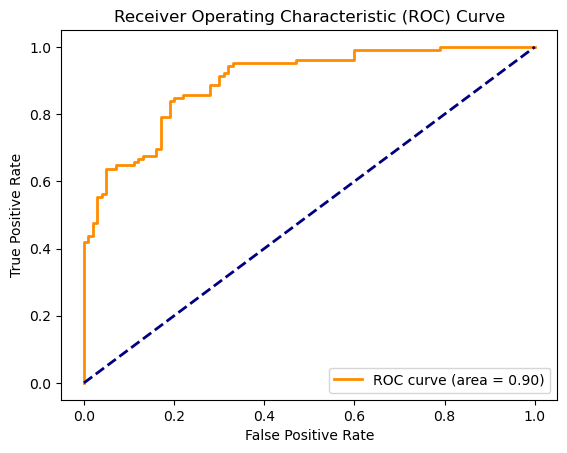

In [2]:
import numpy as np
import pandas as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

heartdata=py.read_csv("heart.csv")

heartdata.head()
heartdata.tail()
# heartdata.shape



heartdata.info()
heartdata.describe()

targets=heartdata['target'].value_counts()

#all columns
X=heartdata.drop(columns='target',axis=1)
#target column
Y=heartdata['target']


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)
# print(X.shape,X_train.shape,X_test.shape)





model=LogisticRegression()
model.fit(X_train,Y_train )


X_train_prediction=model.predict(X_train)
trainigdataaccuracy=accuracy_score(X_train_prediction,Y_train)
# print( trainigdataaccuracy)




X_test_prediction=model.predict(X_test)
testdataaccuracy=accuracy_score(X_test_prediction,Y_test)
print( testdataaccuracy)



input_from_user=(71,0,0,112,149,0,1,125,0,1.6,1,0,2)
input_from_user_array=np.asarray(input_from_user)
input_from_user_reshaped=input_from_user_array.reshape(1,-1)
prediction=model.predict(input_from_user_reshaped)


if prediction[0]==0:
    print("Patient Doesnot have  Any Heart Dieseas")
else:
    print("Patient Has heart dieseas he needs more tests")    




Y_test_probabilities = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, Y_test_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()




# train_accuracies = []
# test_accuracies = []
# for i in range(1, 21):
#     model.set_params(max_iter=i)
#     model.fit(X_train, Y_train)
#     Y_train_predictions = model.predict(X_train)
#     Y_test_predictions = model.predict(X_test)
#     train_accuracy = accuracy_score(Y_train_predictions, Y_train)
#     test_accuracy = accuracy_score(Y_test_predictions, Y_test)
#     train_accuracies.append(train_accuracy)
#     test_accuracies.append(test_accuracy)

# plt.plot(range(1, 21), train_accuracies, label='Training Accuracy')
# plt.plot(range(1, 21), test_accuracies, label='Testing Accuracy')
# plt.xlabel('Number of Iterations')
# plt.ylabel('Accuracy')
# plt.title('Training Progress of Logistic Regression Model')
# plt.legend(loc='lower right')
# plt.show()




# sns.countplot(data= heartdata, x='target', palette="mako")
# plt.xlabel('Has Heart Disease (1 = Yes, 0 = No)')
# plt.ylabel('Count')
# plt.title('Distribution of Heart Disease in Dataset')
# plt.show()



# Plot the heatmap
# fig, ax = plt.subplots(figsize=(15, 15))
# sns.heatmap(heartdata.corr(),ax=ax, annot=True)
# # Show the plot
# plt.show()


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the heart disease dataset
heartdata = pd.read_csv("heart.csv")

# Separate features and target
X = heartdata.drop(columns='target', axis=1)
y = heartdata['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Create and fit a random forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Calculate the accuracy of the model
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", acc_rf)

# Make predictions on a single example
example = [[71, 0, 0, 112, 149, 0, 1, 125, 0, 1.6, 1, 0, 2]]
prediction = rf_model.predict(example)
if prediction[0] == 0:
    print("Patient does not have any heart disease")
else:
    print("Patient has heart disease and needs more tests")

# Calculate the f1 score
f1_rf = classification_report(y_test, y_pred_rf)
print("Random Forest f1 score:")
print(f1_rf)

# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Random Forest confusion matrix:")
print(cm_rf)


Random Forest accuracy: 1.0
Patient has heart disease and needs more tests
Random Forest f1 score:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

Random Forest confusion matrix:
[[100   0]
 [  0 105]]


/home/mariyam/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
heartdata = pd.read_csv("heart.csv")

# all columns
X = heartdata.drop(columns='target', axis=1)
# target column
y = heartdata['target']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# create and fit the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# make predictions on the testing set
y_pred_svm = svm_model.predict(X_test)

# calculate accuracy of the model
acc_svm = accuracy_score(y_test, y_pred_svm)
print("SVM accuracy:", acc_svm)

# make predictions on a single example
example = [[71, 0, 0, 112, 149, 0, 1, 125, 0, 1.6, 1, 0, 2]]
prediction = svm_model.predict(example)
if prediction[0] == 0:
    print("Patient does not have any heart disease")
else:
    print("Patient has heart disease and needs more tests")
# Calculate f1 score
f1_svm = classification_report(y_test, y_pred_svm)
print("SVM f1 score:")
print(f1_svm)

# Calculate confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("SVM confusion matrix:")
print(cm_svm)

SVM accuracy: 0.824390243902439
Patient has heart disease and needs more tests
SVM f1 score:
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       100
           1       0.78      0.92      0.84       105

    accuracy                           0.82       205
   macro avg       0.84      0.82      0.82       205
weighted avg       0.84      0.82      0.82       205

SVM confusion matrix:
[[72 28]
 [ 8 97]]


/home/mariyam/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the heart disease dataset
heartdata = pd.read_csv("heart.csv")

# Separate features and target
X = heartdata.drop(columns='target', axis=1)
y = heartdata['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

# Create and fit a KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_knn = knn_model.predict(X_test)

# Calculate the accuracy of the model
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN accuracy:", acc_knn)

# Make predictions on a single example
example = [[71, 0, 0, 112, 149, 0, 1, 125, 0, 1.6, 1, 0, 2]]
prediction = knn_model.predict(example)
if prediction[0] == 0:
    print("Patient does not have any heart disease")
else:
    print("Patient has heart disease and needs more tests")

# Calculate the f1 score
f1_knn = classification_report(y_test, y_pred_knn)
print("KNN f1 score:")
print(f1_knn)

# Calculate the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("KNN confusion matrix:")
print(cm_knn)


KNN accuracy: 0.7219512195121951
Patient has heart disease and needs more tests
KNN f1 score:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       100
           1       0.74      0.70      0.72       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205

KNN confusion matrix:
[[74 26]
 [31 74]]


/home/mariyam/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Load the heart disease dataset
heartdata = pd.read_csv("heart.csv")

# Separate features and target
X = heartdata.drop(columns='target', axis=1)
Y = heartdata['target']

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Dictionary to store model results
model_results = {}

# Logistic Regression
logistic_model = LogisticRegression(max_iter=100)
logistic_model.fit(X_train, Y_train)
Y_pred_logistic = logistic_model.predict(X_test)
Y_prob_logistic = logistic_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
logistic_accuracy = accuracy_score(Y_test, Y_pred_logistic)
logistic_f1 = classification_report(Y_test, Y_pred_logistic)
fpr_logistic, tpr_logistic, _ = roc_curve(Y_test, Y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

model_results['Logistic Regression'] = {
    'accuracy': logistic_accuracy,
    'f1_score': logistic_f1,
    'roc_auc': roc_auc_logistic
}

# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
Y_pred_knn = knn_model.predict(X_test)
Y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

# Evaluate KNN
knn_accuracy = accuracy_score(Y_test, Y_pred_knn)
knn_f1 = classification_report(Y_test, Y_pred_knn)
fpr_knn, tpr_knn, _ = roc_curve(Y_test, Y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

model_results['K-Nearest Neighbors'] = {
    'accuracy': knn_accuracy,
    'f1_score': knn_f1,
    'roc_auc': roc_auc_knn
}

# Support Vector Machine
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, Y_train)
Y_pred_svm = svm_model.predict(X_test)
Y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate SVM
svm_accuracy = accuracy_score(Y_test, Y_pred_svm)
svm_f1 = classification_report(Y_test, Y_pred_svm)
fpr_svm, tpr_svm, _ = roc_curve(Y_test, Y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

model_results['Support Vector Machine'] = {
    'accuracy': svm_accuracy,
    'f1_score': svm_f1,
    'roc_auc': roc_auc_svm
}

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=2)
rf_model.fit(X_train, Y_train)
Y_pred_rf = rf_model.predict(X_test)
Y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate Random Forest
rf_accuracy = accuracy_score(Y_test, Y_pred_rf)
rf_f1 = classification_report(Y_test, Y_pred_rf)
fpr_rf, tpr_rf, _ = roc_curve(Y_test, Y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

model_results['Random Forest'] = {
    'accuracy': rf_accuracy,
    'f1_score': rf_f1,
    'roc_auc': roc_auc_rf
}

# Display Results
for model_name, metrics in model_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {metrics['accuracy']}")
    print("F1 Score:")
    print(metrics['f1_score'])
    print(f"ROC AUC: {metrics['roc_auc']}")
    print("-" * 50)

# Determine the best model by accuracy
best_model = max(model_results, key=lambda k: model_results[k]['accuracy'])
print(f"The best model based on accuracy is: {best_model} with an accuracy of {model_results[best_model]['accuracy']}")

/home/mariyam/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.8048780487804879
F1 Score:
              precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205

ROC AUC: 0.8982857142857142
--------------------------------------------------
Model: K-Nearest Neighbors
Accuracy: 0.7219512195121951
F1 Score:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       100
           1       0.74      0.70      0.72       105

    accuracy                           0.72       205
   macro avg       0.72      0.72      0.72       205
weighted avg       0.72      0.72      0.72       205

ROC AUC: 0.8591904761904762
--------------------------------------------------
Model: Support Vector Machine
Accuracy: 0.82439024390243